In [65]:
%matplotlib inline

import matplotlib
import matplotlib.pyplot as plt
import pandas as pd
import random
import math
import time

import numpy as np
np.random.seed(1)
from keras.models import Sequential
from keras.layers import Dense
from keras.optimizers import SGD
from keras.models import load_model
#%matplotlib notebook

from numpy.linalg import inv
from numpy import linalg as LA
from scipy import linalg
import random

from matplotlib import animation, rc
from IPython.display import HTML

In [66]:
######## BEGIN HERE ########

#Read training data from matlab
df_x = pd.read_csv('x_train.csv')
df_y = pd.read_csv('y_train.csv')

X_train = df_x.values
Y_train = df_y.values

n_timesteps = len(X_train[:,0])
n_nodes = len(Y_train[0,:])
x = np.linspace(0,1,n_nodes)

In [67]:
#Prepare training and test data
train_portion = 0.8
input_dim = len(X_train[0,:])
output_dim = len(Y_train[0,:])

n_timesteps = len(X_train[:,0])

x_train = X_train[0:int(n_timesteps*train_portion),:]
x_test = X_train[int(n_timesteps*(train_portion)):,:]
y_train = Y_train[0:int(n_timesteps*train_portion),:]
y_test = Y_train[int(n_timesteps*(train_portion)):,:]

In [68]:
#INITIALIZE NEURAL NETWORK

#Neural network
def baseline_model(height, n_layers):
    model = Sequential()
    height = 200
    model.add(Dense(height, input_dim=input_dim, activation='tanh', kernel_initializer='normal'))
    
    for i in range(n_layers):
        model.add(Dense(height, input_dim=height, activation='tanh', kernel_initializer='normal'))
    
    model.add(Dense(output_dim, input_dim=height, activation='linear', kernel_initializer='normal'))
    
    model.compile(loss='mse', optimizer="adam")
    return model


In [69]:
def get_error(predictions, y_test):
    #Total error
    error = 0
    for i in range(len(predictions[:,0])):
        #for j in range(d):
        error += np.trapz((y_test[i,:] - predictions[i,:])**2, x)
    
    return error

In [70]:
columns = ['n_layers', 'height', 'epochs', 'training error', 'test error', 'training time']

df = pd.DataFrame(columns = columns)

df.columns

counter = 0
layer_list = [1,2,4,7,10]
height_list = [10, 20, 50, 100, 200, 500, 1000]
epoch_list = [20, 50, 100, 200]

t0 = time.time()

for layers in layer_list:
    
    for height in height_list:
    
        for epochs in epoch_list:
            
            t_start = time.time()
            
            # Training the model
            model = baseline_model(height, layers)
            model.fit(x_train, y_train, epochs=epochs, verbose = 0)
            
            t_finish = time.time()
            training_time = t_finish - t_start
            
            #Predict
            pred_train = model.predict(x_train)
            pred_test = model.predict(x_test)
            
            #Get errors
            training_error = get_error(pred_train, y_train)
            test_error = get_error(pred_test, y_test)
            
            #Total time
            total_time = time.time() - t0
            
            #Append to dataframe
            df = df.append({'n_layers': layers, 'height': height, 'epochs': epochs, 'training error': training_error,
                                  'test error': test_error, 'training time': training_time}, ignore_index = True)
            
            print('Iteration number: ' + str(counter) + ', Total time: ' + str(total_time))
            print({'n_layers': layers, 'height': height, 'epochs': epochs, 'training error': training_error,
                                  'test error': test_error, 'training time': training_time})
            
            counter += 1
            
            
            
            

Iteration number: 0, Total time: 72.1207823753357
{'n_layers': 1, 'height': 10, 'epochs': 20, 'training error': 0.19090379855797562, 'test error': 0.059594532151010154, 'training time': 71.14414954185486}
Iteration number: 1, Total time: 241.00776362419128
{'n_layers': 1, 'height': 10, 'epochs': 50, 'training error': 0.077059338925389867, 'test error': 0.018297354566810146, 'training time': 167.8933403491974}
Iteration number: 2, Total time: 578.202262878418
{'n_layers': 1, 'height': 10, 'epochs': 100, 'training error': 0.053319147772163948, 'test error': 0.023748557121477717, 'training time': 336.188823223114}
Iteration number: 3, Total time: 1249.502060174942
{'n_layers': 1, 'height': 10, 'epochs': 200, 'training error': 0.040215091758496385, 'test error': 0.026070616225102743, 'training time': 670.2770524024963}
Iteration number: 4, Total time: 1318.7216222286224
{'n_layers': 1, 'height': 20, 'epochs': 20, 'training error': 0.14236094491173309, 'test error': 0.053141676454522675, 't

Iteration number: 40, Total time: 13191.483297348022
{'n_layers': 2, 'height': 100, 'epochs': 20, 'training error': 0.057726798525399178, 'test error': 0.023201287101172131, 'training time': 76.48359298706055}
Iteration number: 41, Total time: 13382.01600933075
{'n_layers': 2, 'height': 100, 'epochs': 50, 'training error': 0.049160329450939233, 'test error': 0.0088813217284720025, 'training time': 188.93752264976501}
Iteration number: 42, Total time: 13755.889244318008
{'n_layers': 2, 'height': 100, 'epochs': 100, 'training error': 0.043374335366265178, 'test error': 0.014674445799112599, 'training time': 372.2800090312958}
Iteration number: 43, Total time: 14515.001687526703
{'n_layers': 2, 'height': 100, 'epochs': 200, 'training error': 0.028319586538472549, 'test error': 0.036300593927947496, 'training time': 757.4580562114716}
Iteration number: 44, Total time: 14593.426699876785
{'n_layers': 2, 'height': 200, 'epochs': 20, 'training error': 0.083008940004562839, 'test error': 0.026

Iteration number: 80, Total time: 28634.188092947006
{'n_layers': 4, 'height': 1000, 'epochs': 20, 'training error': 0.032672026427619599, 'test error': 0.0091171659981017662, 'training time': 96.96289658546448}
Iteration number: 81, Total time: 28875.243859291077
{'n_layers': 4, 'height': 1000, 'epochs': 50, 'training error': 0.036512269563118108, 'test error': 0.011717760998462737, 'training time': 238.61809134483337}
Iteration number: 82, Total time: 29336.59250354767
{'n_layers': 4, 'height': 1000, 'epochs': 100, 'training error': 0.030328464403661892, 'test error': 0.011084567606972674, 'training time': 458.86193656921387}
Iteration number: 83, Total time: 30261.459651231766
{'n_layers': 4, 'height': 1000, 'epochs': 200, 'training error': 0.02068181773793671, 'test error': 0.013713425023100535, 'training time': 922.3714492321014}
Iteration number: 84, Total time: 30378.034509420395
{'n_layers': 7, 'height': 10, 'epochs': 20, 'training error': 0.039199684033342598, 'test error': 0.

KeyboardInterrupt: 

In [71]:
df

,n_layers,height,epochs,training error,test error,training time
0,1.0,10.0,20.0,0.190904,0.059595,71.144150
1,1.0,10.0,50.0,0.077059,0.018297,167.893340
2,1.0,10.0,100.0,0.053319,0.023749,336.188823
3,1.0,10.0,200.0,0.040215,0.026071,670.277052
4,1.0,20.0,20.0,0.142361,0.053142,68.192842
5,1.0,20.0,50.0,0.164027,0.024147,170.360048
6,1.0,20.0,100.0,0.168345,0.052160,351.853386
7,1.0,20.0,200.0,0.098673,0.063910,680.275885
8,1.0,50.0,20.0,0.311005,0.086884,69.682824
9,1.0,50.0,50.0,0.106036,0.029263,173.385444


In [73]:
#df.to_csv('architecture_test.csv')

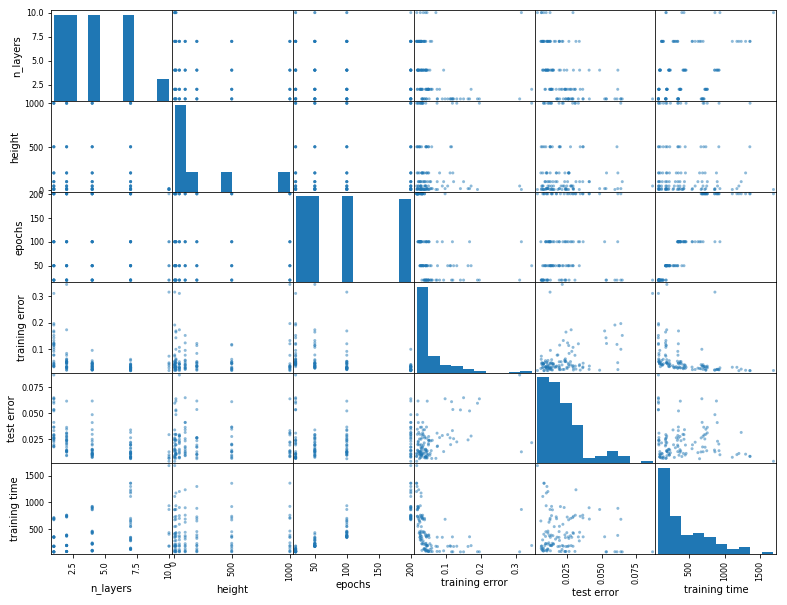

In [93]:
pd.plotting.scatter_matrix(df,figsize=(13,10));

In [100]:
model = baseline_model(20, 40)
model.fit(x_train, y_train, epochs=20, verbose = 1)

Epoch 1/20
4815/4815 [==============================] - 33s 7ms/step - loss: 7.4808e-05
Epoch 2/20
4815/4815 [==============================] - 28s 6ms/step - loss: 7.3781e-05
Epoch 3/20
4815/4815 [==============================] - 29s 6ms/step - loss: 7.3669e-05
Epoch 4/20
4815/4815 [==============================] - 29s 6ms/step - loss: 7.3936e-05
Epoch 5/20
4815/4815 [==============================] - 31s 6ms/step - loss: 7.3417e-05
Epoch 6/20
4815/4815 [==============================] - 31s 7ms/step - loss: 7.3641e-05
Epoch 7/20
4815/4815 [==============================] - 31s 6ms/step - loss: 7.3382e-05
Epoch 8/20
4815/4815 [==============================] - 31s 6ms/step - loss: 7.3320e-05
Epoch 9/20
4815/4815 [==============================] - 31s 6ms/step - loss: 7.3672e-05
Epoch 10/20
4815/4815 [==============================] - 31s 7ms/step - loss: 7.4160e-05
Epoch 11/20
4815/4815 [==============================] - 32s 7ms/step - loss: 7.3737e-05
Epoch 12/20
4815/4815 [=======

In [101]:
preds = model.predict(x_test)
predictions = model.predict(x_train)

In [103]:
get_error(y_test, preds)

0.0057040567286827529

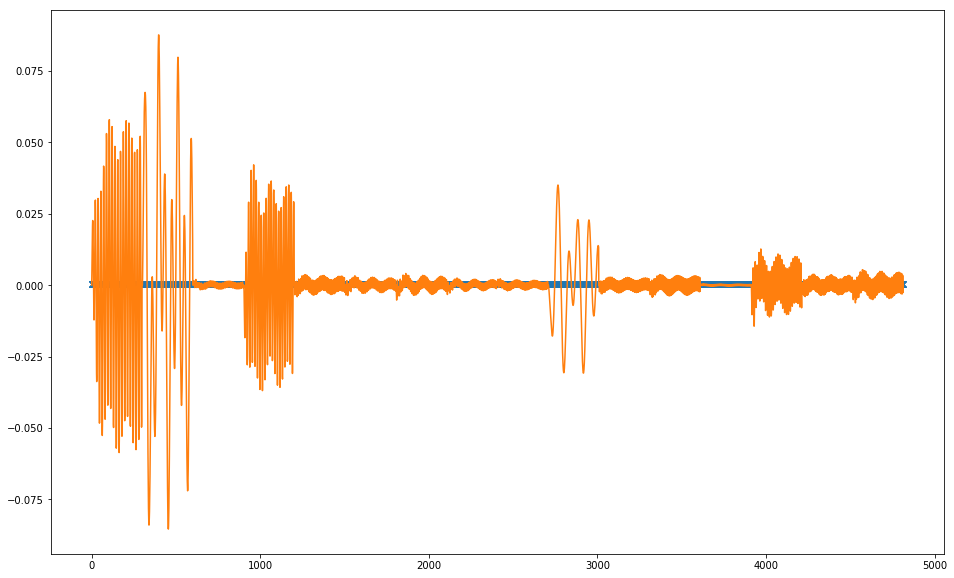

In [104]:
plt.figure(figsize=(16,10))
#plt.plot(preds[:, -1], 'x')
plt.plot(predictions[:,-1],'x')
#plt.plot(y_test[:, -1])
plt.plot(y_train[:, -1])
plt.show()

In [90]:
#Export results
np.savetxt("predictions.csv", predictions, delimiter=",")
np.savetxt("preds.csv", preds, delimiter=",")
np.savetxt("y_test.csv", y_test, delimiter=",")
np.savetxt("y_train.csv", y_train, delimiter=",")